![](https://cdn2.steamgriddb.com/file/sgdb-cdn/grid/53078424bffd4f61f37db5fc749e1afd.png)

# Binding of Isaac: Rebirth Project

<b>About this dataset: </b>[The Binding of Isaac: Rebirth](https://en.wikipedia.org/wiki/The_Binding_of_Isaac:_Rebirth) is an indie roguelike video game designed by Edmund McMillen and developed and published by Nicalis.
<br>

Similar to the original Binding of Isaac, the plot is based on the biblical story of the same name and was inspired by McMillen's religious upbringing. The player controls the eponymous Isaac, a young boy whose mother, convinced that she is doing God's work, strips him of everything and locks him in his room. When Isaac's mother is about to sacrifice him, he escapes to the basement and fights through random, roguelike dungeons. The player defeats monsters, using Isaac's tears as projectiles, and collects items which modify his appearance, attributes, and abilities, potentially creating powerful combinations.
<br>

Three expansions have been released. Afterbirth and Afterbirth+, in October 2015 and January 2017, respectively, with more game content and gameplay modes; Afterbirth+ also added support for user-created content. The third and final expansion, Repentance, was released in March 2021.

<hr>

## Tasks:

The purpose of this project is to focus on gathering the data through websites and cleaning up the data before analyzing it.

1. Use [this website](https://platinumgod.co.uk/all-items) and scrape the information to get data about all the items used in Binding of Isaac: Rebirth, Afterbirth, Afterbirth+, and the Repentance expansion packs.
2. Create a `.csv` file using the scraped data.
3. Tidy the Dataframe to easier to read and break down the Dataframe if sections need to be extracted.
4. Analyze all the data gathered and make possible predictions.

<hr>

### BeautifulSoup Web Scraping:

Because there isn't any datasets for Binding of Isaac, I had to use BeautifulSoup to Web Scrape data and create my own `.csv` file.[<sup id="fn1-back">1</sup>](#fn1)

In [184]:
import requests
from bs4 import BeautifulSoup

webpage_response = requests.get('https://platinumgod.co.uk/all-items')
webpage = webpage_response.content
soup = BeautifulSoup(webpage, 'html.parser')

print(soup)

<!DOCTYPE html>

<html class="dark" id="ht">
<head>
<title>Every Item in The Binding of Isaac: Repentance - Isaac Cheat Sheet - Platinum God</title>
<meta content="Binding of Isaac Rebirth Cheat Sheet wiki. Hover over any item to see detailed and accurate descriptions taken directly from the game's source code." name="description"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
<link href="assets/main.css?v=202111231422" rel="stylesheet" type="text/css"/>
<link href="images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="//fonts.googleapis.com/css?family=Open+Sans:300,400" rel="stylesheet" type="text/css"/>
<link href="https://maxcdn.bootstrapcdn.com/font-awesome/4.5.0/css/font-awesome.min.css" rel="stylesheet"/>
<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(

In [185]:
textbox = soup.find_all('li', class_ = 'textbox')
print(textbox)

[<li class="textbox" data-cid="352" data-sid="1" data-tid="160">
<a>
<div class="item reb-itm-new re-itm001" onclick=""></div>
<span>
<p class="item-title">The Sad Onion</p>
<p class="r-itemid">ItemID: 1</p>
<p class="pickup">"Tears up"</p>
<p class="quality">Quality: 3</p>
<p>+0.7 Tears Up</p>
<ul>
<p>Type: Passive</p>
<p>Item Pool: Item Room</p>
</ul>
<p class="tags">* item room, treasure room, item room pool, green, cry, plant</p>
</span>
</a>
</li>, <li class="textbox" data-cid="12" data-sid="2" data-tid="87">
<a>
<div class="item reb-itm-new re-itm002" onclick=""></div>
<span>
<p class="item-title">The Inner Eye</p>
<p class="r-itemid">ItemID: 2</p>
<p class="pickup">"Triple shot"</p>
<p class="quality">Quality: 2</p>
<p>Tears now shoot three at a time (Triple Shot)</p>
<p>Tears Down significantly</p>
<p><strong class="pri">REPENTANCE</strong> - The Inner Eye now causes less of a decrease in rate of fire than previously, and now has a tighter spread.</p>
<ul>
<p>Type: Passive, Tea

In [186]:
get_rid = soup.find("strong", class_ = 'pri')
get_rid.decompose()

#print(get_rid)

In [187]:
title = []
ID = []
pickup = []
quality = []
description = []


#the elements will automatically be put into lists when appended to list
for element in textbox:
    item_title = element.find("p", class_ = 'item-title')
    item_id = element.find("p", class_ = 'r-itemid')
    item_pickup = element.find("p", class_ = 'pickup')
    item_quality = element.find("p", class_ = 'quality')
    #item_description = element.find("p", class_ = None)
    
    
    #print(item_description)

    for x in item_title:
        #print(x)
        title.append(x)

    if item_id != None:
        for x in item_id:
            #print(x)
            ID.append(x)
    
    if item_pickup != None:
        for x in item_pickup:
            #print(x)
            pickup.append(x)
    
    if item_quality != None:
        for x in item_quality:
            #print(x)
            quality.append(x)
    
    for x in element.find('p', class_ = None):
        for strong in element.findAll('strong', class_ = 'pri'):
            #print(strong)
            strong.decompose()
        #print(x)
        description.append(x)
        
pickup.insert(960, '"D6 + D20"') #The Dice Shard's Pickup was not included in the website
title[199] = 'Humbling Bundle'
title[543] = 'Broken Shovel (Top)'
title[544] = 'Broken Shovel (Bottom)'
title[545] = "Mom's Shovel (Top + Bottom Broken Shovel)"
description[233] = "Increases your chances to find an Angel Room instead of a Devil Room."
description[234] = "Increases your chances to find an Angel Room instead of a Devil Room."

        
#print(title)
#print(ID)
#print(pickup)
#print(quality)
#print(description)

In [188]:
paragraph = []
item_types = []
item_pool = []

for p in soup.select("ul > p"):
    #print(p.text)
    paragraph.append(p.text)
#print(paragraph)

for p in paragraph:
    if 'Type' in p:
        #print(p)
        item_types.append(p)
    if 'Item Pool' in p:
        #print(p)
        item_pool.append(p)

item_types[645] = 'Type: Active, Familiar'        

item_pool[8] = 'Item Pool: Arcade Shell Game'
item_pool[17] = 'Item Pool: Arcade Machine'
item_pool[69] = 'Item Pool: One of the Horsemen Bosses (Famine, Pestilence, War, Death)'
item_pool[86] = 'Item Pool: Tinted Rock'
item_pool[88] = "Item Pool: Item Room, Boss Room"
item_pool[115] = 'Item Pool: Blood Donation Machine'
item_pool[116] = 'Item Pool: Item Room, Secret Room'
item_pool[126] = 'Item Pool: Headless Horseman Boss'
item_pool[128] = 'Item Pool: Krampus Boss'
item_pool[131] = 'Item Pool: Blood Donation Machine'
item_pool[233] = 'Item Pool: Angel Statue in Angel Room'
item_pool[234] = 'Item Pool: Angel Statue in Angel Room'
item_pool[547] = 'Item Pool: Item Room'
item_pool[615] = 'Item Pool: Shop'
item_pool[616] = 'Item Pool: Boss Room, Crane Game, Shop'
item_pool[621] = 'Item Pool: Crane Game, Key Beggar, Item Room'
item_pool[652] = 'Item Pool: Secret Room'
item_pool[657] = 'Item Pool: Shop'
item_pool[698] = 'Item Pool: Curse Room, Secret Room, Super Secret Room'
item_pool[699] = 'Item Pool: Library, Devil Room'

item_pool.insert(543, " ")
item_pool.insert(544, " ")
item_pool.insert(545, " ")
#print(item_pool)

### Create the CSV File:

Here the `.csv` is created under the name `items.csv`.

In [189]:
import csv
from itertools import zip_longest

data = [ID, title, pickup, quality, description, item_types, item_pool]
export_data = zip_longest(*data, fillvalue = '')

with open('items.csv', 'w', encoding = 'UTF-8', newline = '') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(("ID", "Name of Item", "Pickup", "Quality", "Description", "Type", "Item Pool"))
    wr.writerows(export_data)
myfile.close()

In [190]:
import pandas as pd

items = pd.read_csv('items.csv')
items.head()

,ID,Name of Item,Pickup,Quality,Description,Type,Item Pool
0,ItemID: 1,The Sad Onion,"""Tears up""",Quality: 3,+0.7 Tears Up,Type: Passive,Item Pool: Item Room
1,ItemID: 2,The Inner Eye,"""Triple shot""",Quality: 2,Tears now shoot three at a time (Triple Shot),"Type: Passive, Tear Modifier",Item Pool: Item Room
2,ItemID: 3,Spoon Bender,"""Homing shots""",Quality: 3,Gives Isaac's tears a homing effect,Type: Passive,Item Pool: Item Room
3,ItemID: 4,Cricket's Head,"""DMG up""",Quality: 4,+0.5 Damage Up,Type: Passive,Item Pool: Item Room
4,ItemID: 5,My Reflection,"""Boomerang tears""",Quality: 0,Gives tears a boomerang effect,"Type: Passive, Tear Modifier",Item Pool: Item Room


### Tidy and Wrangle Data:

In [191]:
#items.tail(8)
items = items[:-8]
items.tail(10)

,ID,Name of Item,Pickup,Quality,Description,Type,Item Pool
1003,CardID: 97,Soul of Jacob and Esau,"""Bound by blood""",NaN,"Spawns Esau as a temporary familiar, who copie...",NaN,NaN
1004,NaN,Gold Key,NaN,NaN,"Once picked up, you gain unlimited key use for...",NaN,NaN
1005,NaN,Gold Bomb,NaN,NaN,"Once picked up, you gain unlimited bomb use fo...",NaN,NaN
1006,NaN,Golden Battery,NaN,NaN,Fully charges your active item when picked up,NaN,NaN
1007,NaN,Golden Troll Bomb,NaN,NaN,Spawns similar to regular troll bombs and cann...,NaN,NaN
1008,NaN,Golden Penny,NaN,NaN,"When picked up, will respawn again at a random...",NaN,NaN
1009,NaN,Gold Heart,NaN,NaN,"Once picked up, the gold heart will drop money...",NaN,NaN
1010,NaN,Bone Heart,NaN,NaN,Takes three hits to deplete and can be refille...,NaN,NaN
1011,NaN,Rotten Heart,NaN,NaN,Rotten Hearts fill up a whole container the sa...,NaN,NaN
1012,NaN,Black Sack,NaN,NaN,"Spawns 2-3 pills, black/bone hearts and/or bom...",NaN,NaN


#### Miscellaneous Stuff

In [192]:
misc = items.iloc[1004:]
misc = misc.loc[:, ('Name of Item', 'Description')]
misc = misc.reset_index(drop = True)

misc.head(10)

,Name of Item,Description
0,Gold Key,"Once picked up, you gain unlimited key use for..."
1,Gold Bomb,"Once picked up, you gain unlimited bomb use fo..."
2,Golden Battery,Fully charges your active item when picked up
3,Golden Troll Bomb,Spawns similar to regular troll bombs and cann...
4,Golden Penny,"When picked up, will respawn again at a random..."
5,Gold Heart,"Once picked up, the gold heart will drop money..."
6,Bone Heart,Takes three hits to deplete and can be refille...
7,Rotten Heart,Rotten Hearts fill up a whole container the sa...
8,Black Sack,"Spawns 2-3 pills, black/bone hearts and/or bom..."


#### Cards & Other Useable Items

In [193]:
cards = items.iloc[907:1004]
cards = cards.loc[:, ('Name of Item', 'Pickup', 'Description')]
cards = cards.reset_index(drop = True)

cards.tail()

,Name of Item,Pickup,Description
92,Soul of the Keeper,"""$$$""",Spawns up to 25 random coins on the floor
93,Soul of Apollyon,"""Bringer of calamity""",Creates 15 random Locusts
94,Soul of the Forgotten,"""Skeletal protector""",Gives you The Forgotten as a temporary familia...
95,Soul of Bethany,"""Friends from beyond""","Creates 6 wisps, similar to the Book of Virtue..."
96,Soul of Jacob and Esau,"""Bound by blood""","Spawns Esau as a temporary familiar, who copie..."


#### Trinkets

In [194]:
trinkets = items.iloc[719:907]
trinkets = trinkets.loc[:, ('Name of Item', 'Pickup', 'Description')]
trinkets = trinkets.reset_index(drop = True)

trinkets.head()

,Name of Item,Pickup,Description
0,Swallowed Penny,"""Gulp!""","Each time you get hit, you drop a coin or two"
1,Petrified Poop,"""It feels lucky?""","While held, Isaac has a significantly higher c..."
2,AAA Battery,"""Trickle charge""",Lowers your spacebar item charge rate by 1
3,Broken Remote,"""It's broken""",Does the teleport effect every time you use yo...
4,Purple Heart,"""Challenge up""",Higher chance for champion enemies while held


#### Useable Items

In [195]:
useable_items = items.iloc[:719]
useable_items = useable_items.loc[:, ('Name of Item', 'Pickup', 'Quality', 'Description', 'Type', 'Item Pool')]
useable_items = useable_items.reset_index(drop = True)

#useable_items.head()

In [196]:
useable_items['Quality'] = useable_items['Quality'].str.split(':')
useable_items['Quality'] = useable_items['Quality'].str.get(1)
useable_items['Quality'] = pd.to_numeric(useable_items['Quality'])

#useable_items.head()

In [197]:
useable_items['Type'] = useable_items['Type'].str.split(':')
useable_items['Type'] = useable_items['Type'].str.get(1)

useable_items['Secondary Type'] = useable_items['Type'].str[9:]
useable_items['Type'] = useable_items['Type'].str.split(', ')
useable_items['Type'] = useable_items['Type'].str.get(0)

useable_items = useable_items[['Name of Item', 'Pickup', 'Quality', 'Description', 'Type', 'Secondary Type', 'Item Pool']]

#useable_items.head()

In [198]:
useable_items['Item Pool'] = useable_items['Item Pool'].str.split(':')
useable_items['Item Pool'] = useable_items['Item Pool'].str.get(1)

useable_items = useable_items.fillna(" ")

#useable_items.head()

In [199]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.width', 5000)
useable_items.to_html('useable_items_dataframe.html')

#### Pills

In [200]:
#scrape the info for pills and turn that into a dataframe
extra = []
pills = []

rebirth_one = soup.find_all('li', {'data-sid': '1000'})
#print(rebirth_one)
for pill in rebirth_one:
    #print(pill)
    rebirth_pill_one = pill.find_all('p', class_ = None)
    #print(rebirth_pill_one)
    
for pill in rebirth_pill_one:
    for x in pill:
        #print(x)
        pills.append(x)
        

rebirth_two = soup.find_all('li', {'data-sid': '1001'}) 
#print(rebirth_two)
for pill in rebirth_two:
    rebirth_pill_two = pill.find_all('p', class_ = None)
    #print(rebirth_pill_two)

for pill in rebirth_pill_two:
    for x in pill:
        #print(x)
        pills.append(x)

        
afterbirth = soup.find_all('li', {'data-sid': '1002'}) 
for pill in afterbirth:
    afterbirth_pill = pill.find_all('p', class_ = None)
    #print(afterbirth_pill)

for pill in afterbirth_pill:
    for x in pill:
        #print(x)
        pills.append(x)

        
             
afterbirth_plus = soup.find_all('li', {'data-sid': '1003'})
for pill in afterbirth_plus:
    afterbirth_plus_pill = pill.find_all('p', class_ = None)
    #print(afterbirth_plus_pill)

for pill in afterbirth_plus_pill:
    for x in pill:
        #print(x)
        pills.append(x)
        
        
    
repentance = soup.find_all('li', {'data-sid': '1004'})
for pill in repentance:
    repentance_pill = pill.find_all('p', class_ = None)
    #print(repentance_pill)

for pill in repentance_pill:
    for x in pill:
        #print(x)
        pills.append(x)

        
#print(pills)

In [201]:
data = [pills]
export_data = zip_longest(*data, fillvalue = '')

with open('pills.csv', 'w', encoding = 'UTF-8', newline = '') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(("P"))
    wr.writerows(export_data)
myfile.close()

In [202]:
pills = pd.read_csv('pills.csv')
#pills.head()

In [203]:
pills['str_split'] = pills['P'].str.split(' - ')
pills['Pill Name'] = pills['str_split'].str.get(0)
pills['Description'] = pills['str_split'].str.get(1)

In [204]:
del pills['str_split']
del pills['P']

pills.head()

,Pill Name,Description
0,48 Hour Energy,Fully recharges your active item and drops 1-2...
1,Amnesia,Hides the floor map for the rest of the curren...
2,Bad Gas,"Isaac farts, poisoning enemies around him"
3,Bad Trip,Deals damage to yourself
4,Balls of Steel,+2 Soul Hearts


#### Characters

*These following characters were removed from the `.csv`:
- Eden: Heart containers, damage, tears, shot speed, range, speed, luck, starting pickups are all randomized each round.
- The Forgotton + The Soul: This is a 2-in-1 character, each with different heart containers, damage, etc. If one dies, then both die.
- Jacob + Esau: These 2 characters are played together, but each has different statistics. If one character dies, then both die.
- Dark Judas: Didn't want to include Dark Judas as I didn't want Judas to be confused with Dark Judas.
- The Keeper: The Keeper has special heart containers made of coins that can be refilled with picking up coins.


In [224]:
import numpy as np


characters = pd.read_csv('binding_of_isaac_characters.csv')

characters['Health in Red Hearts'] = pd.to_numeric(characters['Health in Red Hearts'])

characters.head(13)

,Character,Health in Red Hearts,Health in Soul Heart,Health in Black Heart,Damage,Tears,Shot Speed,Range,Speed,Luck,Starting Pickup(s),Starting Item(s)
0,Isaac,3.0,NaN,NaN,3.500,0.0,1.00,6.5,1.00,0,1 bomb,The D6
1,Magdalene,4.0,NaN,NaN,3.500,0.0,1.00,6.5,0.85,0,NaN,Yum Heart
2,Cain,2.0,NaN,NaN,4.200,0.0,1.00,4.5,1.30,0,1 key,Lucky Foot
3,Judas,1.0,NaN,NaN,4.725,0.0,1.00,6.5,1.00,0,3 coins,The Book of Belial
4,??? (Blue Baby),NaN,3.0,NaN,3.675,0.0,1.00,6.5,1.10,0,NaN,The Poop
5,Eve,2.0,NaN,NaN,2.625,0.0,1.00,6.5,1.23,0,NaN,"Whore of Babylon, Dead Bird"
6,Samson,3.0,NaN,NaN,3.500,-0.1,1.31,5.0,1.10,0,NaN,Bloody Lust
7,Azazel,NaN,NaN,3.0,5.250,0.5,1.00,4.5,1.25,0,0 - The Fool,"Brimstone, Flight"
8,Lazarus,3.0,NaN,NaN,3.500,0.0,1.00,4.5,1.00,-1,1 pill,Anemic
9,The Lost,NaN,NaN,NaN,3.500,0.0,1.00,6.5,1.00,1,1 coin,"Flight, Spectral tears"


### Analyze Data:

#### 1. Use a Bar Graph to Look at Each Character's Health Stats

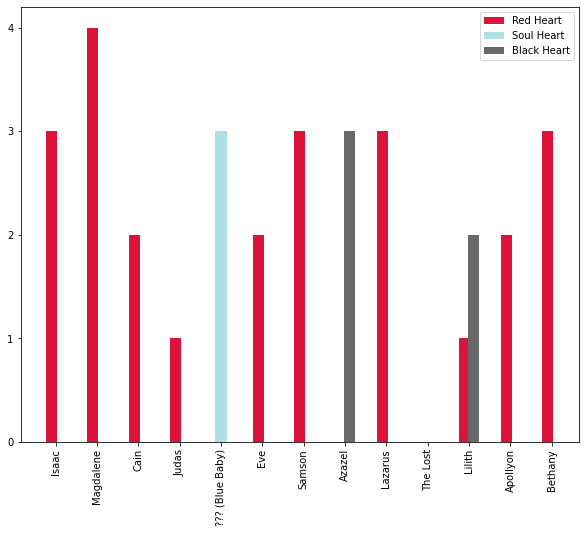

In [232]:
import matplotlib.pyplot as plt

#Bar 1
n = 1
t = 3
d = 13
w = 0.3
x_values1 = [t * element + w * n for element in range(d)]

#Bar 2
n = 2
x_values2 = [t * element + w * n for element in range(d)]

#Bar 3
n = 3
x_values3 = [t * element + w * n for element in range(d)]


plt.figure(figsize = (10, 8))
ax = plt.subplot()
plt.bar(x_values1, characters['Health in Red Hearts'], label = 'Red Heart', color = 'crimson')
plt.bar(x_values2, characters['Health in Soul Heart'], label = 'Soul Heart', color = 'powderblue')
plt.bar(x_values3, characters['Health in Black Heart'], label = 'Black Heart', color = 'dimgray')

ax.set_xticks(x_values2)
ax.set_xticklabels(characters['Character'], rotation = 90)
ax.set_yticks(range(5))

plt.legend()

plt.show()



There are a majority of characters that start out with red hearts with the exception of ??? (Blue Baby), Azazel, and Lilith. ??? (Blue Baby) starts with 3 soul hearts, Azazel starts with 3 black hearts, and Lilith starts with 1 red heart, and 2 black hearts.

#### 2. Use Bar Graphs to Look at Each Character's Damage, Shot Speed, etc. and Compare Them

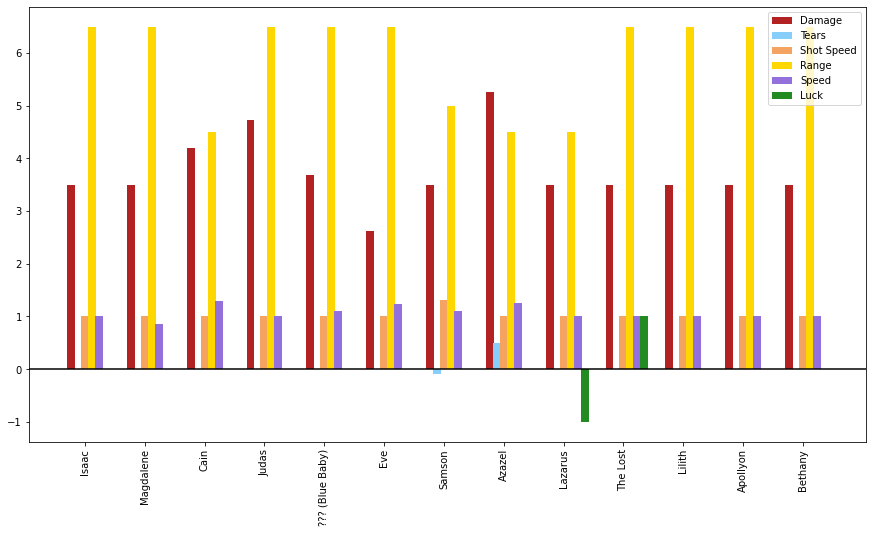

In [209]:
#Bar 1
n = 1
t = 6
d = 13
w = 0.7
x_values1 = [t * element + w * n for element in range(d)]

#Bar 2
n = 2
x_values2 = [t * element + w * n for element in range(d)]

#Bar 3
n = 3
x_values3 = [t * element + w * n for element in range(d)]

#Bar 4
n = 4
x_values4 = [t * element + w * n for element in range(d)]

#Bar 5
n = 5
x_values5 = [t * element + w * n for element in range(d)]

#Bar 6
n = 6
x_values6 = [t * element + w * n for element in range(d)]


plt.figure(figsize = (15, 8))
ax = plt.subplot()
plt.bar(x_values1, characters['Damage'], label = 'Damage', color = 'firebrick')
plt.bar(x_values2, characters['Tears'], label = 'Tears', color = 'lightskyblue')
plt.bar(x_values3, characters['Shot Speed'], label = 'Shot Speed', color = 'sandybrown')
plt.bar(x_values4, characters['Range'], label = 'Range', color = 'gold')
plt.bar(x_values5, characters['Speed'], label = 'Speed', color = 'mediumpurple')
plt.bar(x_values6, characters['Luck'], label = 'Luck', color = 'forestgreen')

ax.set_xticks(x_values3)
ax.set_xticklabels(characters['Character'], rotation = 90)
plt.axhline(y=0, color='black')
plt.legend()

plt.show()

This just shows the starting statistics (outside of health) for each character. Most of the characters tend to have the same starting statistics, but a couple have a higher/lower tear rate or luck than the rest.

#### 3. How Many Items are Active and How Many are Passive?

In [181]:
#separate the active and passive items

useable_items['Type'] = useable_items['Type'].astype('string') #need to change 'Type' to string type instead of object type
useable_items['Type'] = useable_items['Type'].str.strip()

active_items = useable_items[useable_items['Type'] == 'Active']
active_items.head()

,Name of Item,Pickup,Quality,Description,Type,Secondary Type,Item Pool
32,The Bible,"""Temporary flight""",1,"Gives Isaac angel wings for the current room, ...",Active,,"Shop, Library, Angel Room"
33,The Book of Belial,"""Temporary DMG up""",3,"Upon use, gives +2 damage up which lasts for t...",Active,,"Library, Devil Room"
34,The Necronomicon,"""Mass room damage""",1,Deals 40 damage to everything in the room when...,Active,,"Library, Secret Room, Devil Room"
35,The Poop,"""Plop!""",0,Drops a poop on the floor,Active,,Item Room
36,Mr. Boom,"""Reusable bomb buddy""",1,Drops a large bomb below the player which does...,Active,,"Item Room, Wrath Miniboss, Bomb Beggar"


In [182]:
passive_items = useable_items[useable_items['Type'] == 'Passive']
passive_items.head()

,Name of Item,Pickup,Quality,Description,Type,Secondary Type,Item Pool
0,The Sad Onion,"""Tears up""",3,+0.7 Tears Up,Passive,,Item Room
1,The Inner Eye,"""Triple shot""",2,Tears now shoot three at a time (Triple Shot),Passive,Tear Modifier,Item Room
2,Spoon Bender,"""Homing shots""",3,Gives Isaac's tears a homing effect,Passive,,Item Room
3,Cricket's Head,"""DMG up""",4,+0.5 Damage Up,Passive,,Item Room
4,My Reflection,"""Boomerang tears""",0,Gives tears a boomerang effect,Passive,Tear Modifier,Item Room


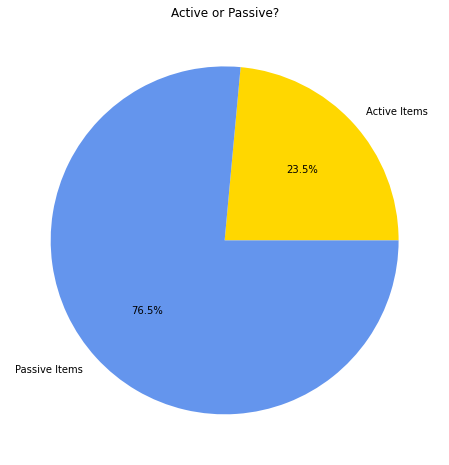

In [217]:
item_graph = []
item_graph.append(len(active_items['Type']))
item_graph.append(len(passive_items['Type']))
#print(item_graph)

labels = ['Active Items', 'Passive Items']

plt.figure(figsize = (10, 8))
plt.pie(item_graph, labels = labels, colors = ['gold', 'cornflowerblue'], autopct = '%0.1f%%')

plt.title("Active or Passive?")
plt.show()

A majority of items in the game are passive (usually adds to character's statistics), while less than a quarter are active items.

#### 4. What is the Percent of Cards, Trinkets, etc. to Items?

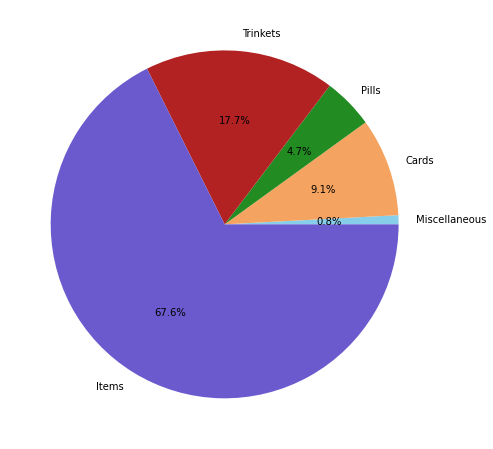

In [230]:
#use a pie chart to find the proportion of cards, trinkets, misc, and items

all_items_graph = []
all_items_graph.append(len(misc))
all_items_graph.append(len(cards))
all_items_graph.append(len(pills))
all_items_graph.append(len(trinkets))
all_items_graph.append(len(useable_items))

labels = ['Miscellaneous', 'Cards', 'Pills', 'Trinkets', 'Items']


plt.figure(figsize = (10, 8))

plt.pie(all_items_graph, labels = labels, colors = ['skyblue', 'sandybrown', 'forestgreen', 'firebrick', 'slateblue'], autopct = '%0.1f%%')
plt.show()

When looking at the total things within the game, a majority are items (both passive and aggressive), with a smaller percentage in trinkets, cards, pills, and miscellaneous (in that order from largest to smallest).

#### 5. When Dropping an Item, What is it Likely to Be: A Card, or Trinket?

First we need to find the sample size needed using the Baseline Conversion Rate, Minimum Detectable Effect, and the Significance Threshold for trinkets.

In [236]:
amount_trinkets = len(trinkets)
amount_total = len(items)

baseline = (amount_trinkets / amount_total) * 100
print("Baseline: " + str(round(baseline, 2)) + "%")

Baseline: 18.56%


Suppose that 18.56% of trinkets will be dropped over a card. We're thinking about adding a new trinket, but it would be more worth it if the trinket was dropped 23% instead.

In [239]:
new_baseline = 23 #23%

mde = ((new_baseline - baseline) / baseline) * 100
print("Minimum Detectable Effect: " + str(round(mde, 2)) + "%")

Minimum Detectable Effect: 23.93%


The most common Significance Threshold is 95%, so we will stick with using that too.

<br>

Using a [sample size calculator](https://www.optimizely.com/sample-size-calculator/?conversion=18.56&effect=23.93&significance=95), we get the sample size of <b>830</b>. Now we will use that number to create a simulation to determine if a card or trinket would be more likely to be dropped.

In [242]:
card_percent = (len(cards) / amount_total) * 100
print(str(round(card_percent, 2)) + "%")

9.58%


In [246]:
sample_trinket = np.random.choice(['yes', 'no'], size = 415, p = [0.1856, 0.8144])
sample_card = np.random.choice(['yes', 'no'], size = 415, p = [0.0958, 0.9042])

In [248]:
group = ['trinket'] * 415 + ['card'] * 415
outcome = list(sample_trinket) + list(sample_card)

sim_data = {'Trinket or Card?': group, "Dropped?": outcome}
sim_data = pd.DataFrame(sim_data)
sim_data.head()

,Trinket or Card?,Dropped?
0,trinket,no
1,trinket,no
2,trinket,no
3,trinket,no
4,trinket,no


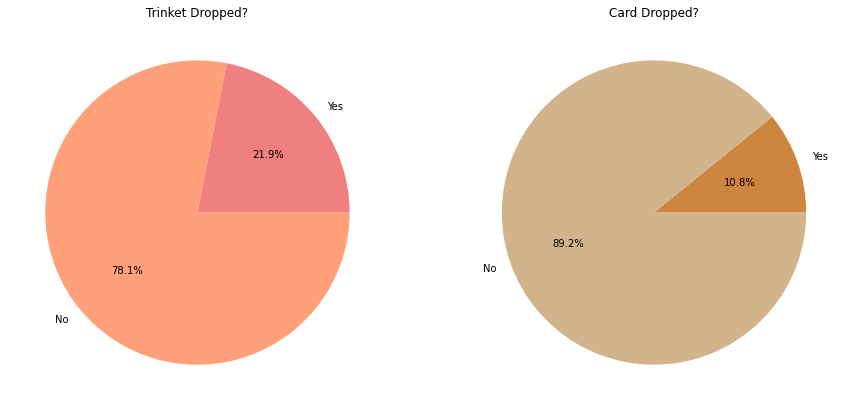

In [251]:
sim_data_trinket = sim_data[sim_data['Trinket or Card?'] == 'trinket']
sim_data_trinket_dropped = sim_data_trinket[sim_data_trinket['Dropped?'] == 'yes']
#print(len(sim_data_trinket_dropped))
sim_data_trinket_not_dropped = sim_data_trinket[sim_data_trinket['Dropped?'] == 'no']

sim_data_card = sim_data[sim_data['Trinket or Card?'] == 'card']
sim_data_card_dropped = sim_data_card[sim_data_card['Dropped?'] == 'yes']
#print(len(sim_data_card_dropped))
sim_data_card_not_dropped = sim_data_card[sim_data_card['Dropped?'] == 'no']


plt.figure(figsize = (15, 8))
ax1 = plt.subplot(1, 2, 1)
plt.pie([len(sim_data_trinket_dropped), len(sim_data_trinket_not_dropped)], labels = ['Yes', 'No'], autopct = '%0.1f%%', 
        colors = ['lightcoral', 'lightsalmon'])
plt.title("Trinket Dropped?")

ax2 = plt.subplot(1, 2, 2)
plt.pie([len(sim_data_card_dropped), len(sim_data_card_not_dropped)], labels = ['Yes', 'No'], autopct = '%0.1f%%', 
        colors = ['peru', 'tan'])
plt.title("Card Dropped?")


plt.show()

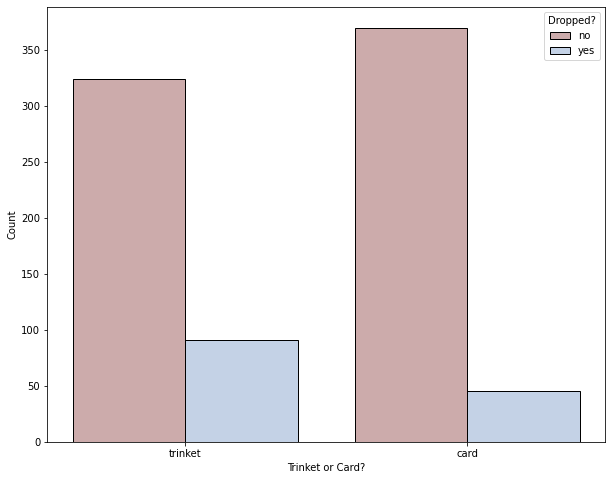

In [253]:
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.histplot(data = sim_data, x = 'Trinket or Card?', hue = 'Dropped?', multiple = 'dodge', shrink = 0.8, palette = ['#BC8F8F', '#B0C4DE'])

plt.show()

Looking at these 2 graphs, it is most likely that neither a card or trinket will drop; at a 21.9% a trinket will drop, and a card will drop at even less at 10.8%. It's likely that another item may drop, or nothing at all.

<hr>

[<sup id="fn1">1</sup>](#fn1-back) [Descriptions for Items in Binding of Isaac](https://platinumgod.co.uk/all-items).